# Intermediate Algebra

## Find Factors, Prime Factorizations, and Least Common Multiples

### Calculate a series of multiples; the product of a base number and a counting number.

Two methods are shown.

- The first is the familiar for loop method, printing the output to the sys.stdout.
- The second returns a pandas DataFrame, with a single series.

In [2]:
import numpy as np
import pandas as pd
import json
import time

def big_table(count: int):

    '''
    Show a big table of multiples.

    Parameters:

        count : int     The number of base number tables to generate.
    '''

    table_container = []

    for i in range(1, count+1):

        table_container.append(mult_table_internal(i, 12))

    df = pd.DataFrame()

    for i in table_container:

        df = pd.concat([df, i], axis=1, ignore_index=True)

    df.columns = [x for x in range(1, df.shape[1]+1)]
    
    return df

def mult_table(base: int, count: int) -> pd.DataFrame:

    '''
    Calculate and display the multiples of a base number.

    Formula: base*i for i in range(count).

    Parameters:

        base : int      The base number for which to calculate multiples.

        count : int     The range of counting numbers.

    Returns:

        df : dataframe  The table of mutliples in a dataframe.
    '''

    start = time.time()

    base = int(base)

    count = int(count)

    '''
    Traditional for loop method:

    for i in range(1, count+1, 1):

        print(f'{base} * {i} = {base*i}')
    '''

    df = pd.DataFrame([base*i for i in range(count+1)], columns=[f'Multiples of {base}'], index=[f'{base}*{i}' for i in range(count+1)])

    stop = time.time()

    return df

def mult_table_internal(base: int, count: int) -> pd.DataFrame:

    '''
    Calculate and display the multiples of a base number.

    Formula: base*i for i in range(count).

    Parameters:

        base : int      The base number for which to calculate multiples.

        count : int     The range of counting numbers.

    Returns:

        df : dataframe  The table of mutliples in a dataframe.
    '''

    start = time.time()

    base = int(base)

    count = int(count)

    '''
    Traditional for loop method:

    for i in range(1, count+1, 1):

        print(f'{base} * {i} = {base*i}')
    '''

    df = pd.DataFrame([base*i for i in range(count+1)])

    stop = time.time()

    return df

In [103]:
mult_table(3, 12).T

,3*0,3*1,3*2,3*3,3*4,3*5,3*6,3*7,3*8,3*9,3*10,3*11,3*12
Multiples of 3,0,3,6,9,12,15,18,21,24,27,30,33,36


In [4]:
df = big_table(10)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,1,2,3,4,5,6,7,8,9,10,11,12
2,0,2,4,6,8,10,12,14,16,18,20,22,24
3,0,3,6,9,12,15,18,21,24,27,30,33,36
4,0,4,8,12,16,20,24,28,32,36,40,44,48
5,0,5,10,15,20,25,30,35,40,45,50,55,60
6,0,6,12,18,24,30,36,42,48,54,60,66,72
7,0,7,14,21,28,35,42,49,56,63,70,77,84
8,0,8,16,24,32,40,48,56,64,72,80,88,96
9,0,9,18,27,36,45,54,63,72,81,90,99,108
10,0,10,20,30,40,50,60,70,80,90,100,110,120


### If divisible?

We want to check divisiblity to confirm a number is a multiple.

Write an algorithm to test if the input number `n` is a multiple of `x`.

In [5]:
def divisibility_check(number):

    if number%10 == 0 or number%10 == 2 or number%10 == 4 or number%10 == 6 or number%10 == 8:

        print('Divisible by 2')

    if sum([int(i) for i in list(str(number))])%3 == 0:

        print('Divisible by 3')

    if number%10 == 0 or number%10 == 5:

        print('Divisible by 5')

    if (number%10 == 0 or number%10 == 2 or number%10 == 4 or number%10 == 6 or number%10 == 8) and (sum([int(i) for i in list(str(number))])%3 == 0):

        print('Divisible by 6')
    
    if number%10 == 0:

        print('Divisible by 10')

In [6]:
divisibility_check(24)

Divisible by 2
Divisible by 3
Divisible by 6


### Factorize

Display the factors of n, and whether it is prime or composite.

In [7]:
def factorize(number):

    '''
    Display factors of `n`, and check primality.

    Parameters

        n : int - The number to factorize and check for primality.

    Note:

        Could be optimized by:

            - Returning false if `n` is less than or equal to 3.

            - Ending the algorithm when n > sqrt(n), where sqrt(n) == i>j effectively.
    '''

    if number == 1:

        print('Factors: [1]')

        print('It took mathematicians more than 1000 years to decided whether or not 1 is prime.\nI guess they\'ve mostly settled on No.')
    
    else:
        
        sample_range = []

        factors = []

        for i in np.linspace(1, number, number):

            sample_range.append(int(i))
        
        for i in range(number):

            for j in sample_range:

                if i>j:

                    pass
                
                elif i*j == number:

                    factors.append(i)
                    
                    factors.append(j)

        factors.sort()

        print(f'Factors: {factors}')

        if factors[1] == number:

            print(f'{number} is prime.')

        else:

            print(f'{number} is composite.')

        return factors

def factorize_df(number):

    '''
    Return a table of factors of n as index, and their factors as a list.

    Parameters

        number : int - n to factor.
    '''

    dict = {}

    for i in factorize(number):

        dict[i] = factorize(i)

    return pd.DataFrame.from_dict(dict, orient='index')

In [8]:
f = factorize(1403)

Factors: [1, 23, 61, 1403]
1403 is composite.


In [9]:
f = factorize(2)

Factors: [1, 2]
2 is prime.


In [10]:
f = factorize(1)

Factors: [1]
It took mathematicians more than 1000 years to decided whether or not 1 is prime.
I guess they've mostly settled on No.


### Multiplicative Inverse

Display the multiplicative inverse of n, which if you know what that is congratulations on your job in mathematics.

In [11]:
def multiplicative_inverse(number):

    '''
    Display the multiplicative inverse of n.

    Formula: n * (1/n) = 1, where (1/n) is the multiplicative inverse.

    Parameters:

        number : int - The number from which to determine the multiplicative inverse.
    '''

    if number * (1/number) == 1.0:

        print(f'{1/number} is the multiplicative inverse of {number}.')

In [12]:
multiplicative_inverse(8762)

0.00011412919424788861 is the multiplicative inverse of 8762.


In [13]:
0.00011412919424788861 * 8762

1.0

### Common Multiples

#### Find the common multiples of 2 sets of numbers, with pandas.

Create `DataFrames` from our multiples functions, and use them for other computations.

In [95]:
def common_multiples_df(x1, x2, y):

    '''
    Find the common multiples between x1*y and x2*y, with dataframes.

    Parameters:

        x1 : int - Base number a.

        x2 : int - Base number b.

        y : int - Counting number.
    '''

    df = mult_table(x1, y)
    df2 = mult_table(x2, y)

    df.columns, df2.columns = [0],[0]

    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    common_multiples = []

    for i in df2[0]:
        
        for j in df[0]:

            if i == j:

                common_multiples.append(i)

    return common_multiples

x1 = input('Base number a:')
x2 = input('Base number b:')

y = input('Counting number: ')

print(f'Common multiples between {x1}*{y} and {x2}*{y}: {common_multiples_df(x1, x2, y)}')

Common multiples between 10*20 and 25*20: [0, 50, 100, 150, 200]


#### Sets with python

"Computing mathematical operations such as intersection, union, difference, and symmetric difference." - [python.org](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)

\* Also note, sets are unordered in python so they lose their order of insertion and position.

In [106]:
def set_tests(x1, x2, y):

    '''
    Find the common multiples between x1*y and x2*y, with pandas and python.

    Parameters:

        x1 : int - Base number a.

        x2 : int - Base number b.

        y : int - Counting number.
    '''

    df = mult_table(x1, y)
    df2 = mult_table(x2, y)

    df.columns, df2.columns = [0],[0]

    df = df.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    set_1, set_2 = set(df[0].sort_values()), set(df2[0].sort_values())

    print(f'Membership test: {set_1} in {set_2}? {set_1 in set_2}')
    
    print(f'Non-membership test: {set_1} not in {set_2}? {set_1 not in set_2}')

    print(f'Disjoint test: {set_1} is disjoint {set_2}? {set_1.isdisjoint(set_2)}')

    print(f'Union: {set_1} | {set_2} = {set_1.union(set_2)}')

    print(f'Intersection: {set_1} & {set_2} = {set_1.intersection(set_2)}')

    print(f'Difference: {set_1} - {set_2} = {set_1.difference(set_2)}')

x1 = input('Base number a:')
x2 = input('Base number b:')

y = input('Counting number:')

set_tests(x1, x2, y)

Membership test: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} in {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125}? False
Non-membership test: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} not in {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125}? True
Disjoint test: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} is disjoint {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125}? False
Union: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} | {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125} = {0, 70, 200, 10, 75, 80, 20, 150, 25, 90, 30, 225, 100, 40, 175, 50, 250, 60, 125}
Intersection: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} & {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125} = {0, 50, 100}
Difference: {0, 100, 70, 40, 10, 80, 50, 20, 90, 60, 30} - {0, 225, 100, 200, 75, 175, 50, 150, 25, 250, 125} = {70, 40, 10, 80, 20, 90, 60, 30}


### Least Common Multiples

Using the prime factors method

In [15]:
from IPython.display import clear_output

# get table of factors
df = factorize_df(124)
clear_output()
df
# by what criteria do we choose factors to simplify?

,0
1,None
2,"[1, 2]"
4,"[1, 2, 2, 4]"
31,"[1, 31]"
62,"[1, 2, 31, 62]"
124,"[1, 2, 4, 31, 62, 124]"


### Graph a number line

In [16]:
import matplotlib.pyplot as plt

class Plotter:

    def __init__(self, x, y):

        '''
        Simple data plotter.

        Parameters:

            x : float|int

            y : float|int

            optional

                title : str - Title of the plot.

        Methods:

            plot()
        '''

        self._x = x

        self._y = y

    def plot(self, ax=None, **kw):

        '''
        Rigid plotter for a 2d line plot.
        '''

        if ax is None:

            ax = plt.gca()

        ax.plot(self._x, self._y)
        
        ax.set_title(kw.get('title', ''))

        return ax

<AxesSubplot:title={'center':'My time.'}>

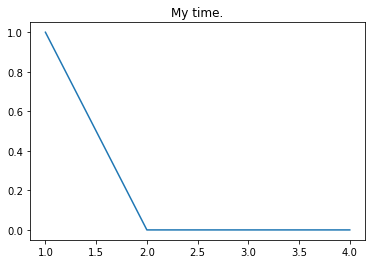

In [17]:
d = Plotter([1, 2, 3, 4], [1, 0, 0, 0])
d.plot(title='My time.')
